## DL Basics
We know that most data is not easily linearly separable. So how do we get a non-linear model to better classify our data? This is done with the combination of 2 or more linear models. We will here show how a combination of 2 perceptrons will give us the desired boundary below.
<img src = dl1.png>

As you can see we have 2 linear models but they both badly classify the data. Combining them however results in a boundary that does well in classifying the data.  
<img src = dl2.png>

With each linear model in a perceptron the resulting network classifies the data well. The input with the highest weight has the most effect on the results

<img src = dl3.png>
<img src = dl4.png>
<img src = dl5.png>
<img src = dl6.png>
<img src = dl7.png>
<img src = dl8.png>
<img src = dl9.png>
<img src = dl10.png>
<img src = dl11.png>
<img src = dl12.png>
<img src = dl13.png>
<img src = dl14.png>
<img src = dl15.png>
<img src = dl16.png>
<img src = dl17.png>
<img src = dl18.png>






In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [ ]:
n_pts = 500
# Previously we used make_blobs now we use make_circles
# This will create an inner circle of datapts, and an outer circle of datapts 
# and our algo will need to separate these
# The 1st and 2nd args are the same, the 3rd arg is the gaussian noise that is
# added to the function (diff to the centers arg for make_blobs) - 
# larger noise will cause datapts to deviate from orig shape, 
# here with 2 circles larger noise value will make them look more
# clustered and not so organised - e.g. noise of 0 gives 2 perfect circles
# we use noise = 0.1 which means our pts are not all mixed up, but it does 
# make our data a bit more difficult to classify
# The 4th arg instead of cluster_std is factor - this is the relative size of the
# inner circular region in comparison to the larger outer circle, 
# factor = 1 returns 2 circles of the same size 
# Here when we say factor = 0.2 - this means make the inner circle's diameter
# 20% of the outer circles
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, \
                           noise = 0.1, factor = 0.2)
x_data = torch.Tensor(X) # X, y are numpy arrays so convert to Tensors
y_data = torch.Tensor(y.reshape(500,1))

In [ ]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

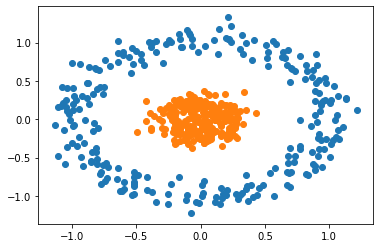

In [20]:
scatter_plot()

In [ ]:
# Perceptron based model - consists of an input_layer and an output_layer
# This is not enough to fit this data now, so we'll build a deeper network
# class Model(nn.Module):
#   def __init__(self, input_size, output_size):
#     super().__init__()
#     self.linear = nn.Linear(input_size, output_size)

#   def forward(self, x):
#     pred = torch.sigmoid(self.linear(x))    
#     return pred

#   def predict(self, x):
#     pred = self.forward(x)
#     if pred >= 0.5:
#       return 1
#     else:
#       return 0

# Here our deeper network needs more hidden layers in between the input and output
# to classify more complex data
# So here we add an H1 btw the input and output layers
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    # amend here as the input layer is first fully connected to the hidden layer
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)

  def forward(self, x):
    # account for hidden layer in forward fn as well, since
    # inputs need to be passed thru' entire depth of the network
    # so change pred to x and add the hidden layer
    x = torch.sigmoid(self.linear(x))    
    x = torch.sigmoid(self.linear2(x))   
    return x

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0      

In [22]:
torch.manual_seed(2)
model = Model(2,4,1) # 2 inputs, 4 hidden, 1 output (0 or 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [ ]:
criterion = nn.BCELoss()
# Adam is a combination of 2 SGD algos - Adagrad and RMSprop
# It is very good optimiser for updating weights and bias of our network
# We must choose a proper Learning rate - too small = slow convergence towards the min
# too big = hinder convergence (it can go past the min)
optimiser = torch.optim.Adam(model.parameters(), lr = 0.1) # new optimiser

In [24]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print(f'epoch: {i}, loss: {loss.item()}')
  losses.append(loss.item())
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()


epoch: 0, loss: 0.7148522138595581
epoch: 1, loss: 0.6947320699691772
epoch: 2, loss: 0.6955163478851318
epoch: 3, loss: 0.7014891505241394
epoch: 4, loss: 0.7013985514640808
epoch: 5, loss: 0.6974702477455139
epoch: 6, loss: 0.6939254403114319
epoch: 7, loss: 0.6928594708442688
epoch: 8, loss: 0.6939384937286377
epoch: 9, loss: 0.6954389810562134
epoch: 10, loss: 0.6958749294281006
epoch: 11, loss: 0.6949177384376526
epoch: 12, loss: 0.6931487321853638
epoch: 13, loss: 0.6913900375366211
epoch: 14, loss: 0.6901611685752869
epoch: 15, loss: 0.6894587874412537
epoch: 16, loss: 0.6888436079025269
epoch: 17, loss: 0.6877667307853699
epoch: 18, loss: 0.685900866985321
epoch: 19, loss: 0.6832477450370789
epoch: 20, loss: 0.6800417304039001
epoch: 21, loss: 0.6765585541725159
epoch: 22, loss: 0.6729682087898254
epoch: 23, loss: 0.6692693829536438
epoch: 24, loss: 0.6653285026550293
epoch: 25, loss: 0.6609663963317871
epoch: 26, loss: 0.656058669090271
epoch: 27, loss: 0.6505836248397827
epoc

Text(0, 0.5, 'Loss')

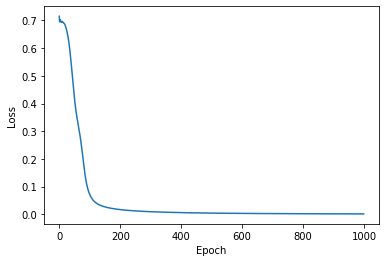

In [25]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [ ]:
# Return a contour plot of the decision boundary
def plot_decision_boundary(X, y):
  # 50 linearly spaced pts between the min x coord and max x coord
  x_span = np.linspace(min(X[:,0]) - .25, max(X[:,0]) + .25)
  # 50 linearly spaced pts between the min y coord and max y coord
  y_span = np.linspace(min(X[:,1]) - .25, max(X[:,1]) + .25)
  # mesh_grid takes the x_span vector of 50 elements and returns  a 2D 50 x 50 matrix
  # The newly added rows are copies of the original. It does the same for y_span
  xx, yy = np.meshgrid(x_span, y_span)
  # Now let's flatten the 2D arrays into 1D arrays and concatenate them
  # Finally convert to a tensor
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid) # test the pts in the grid and return predictions of the pt being 1
  # reshape to be same as xx, yy so that prediction results are linked to their appropriate coord counterparts
  # we want it to be xx shape, but we need to detach() - detach() excludes any
  # subgraphs from gradient computation associated with pred_func
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

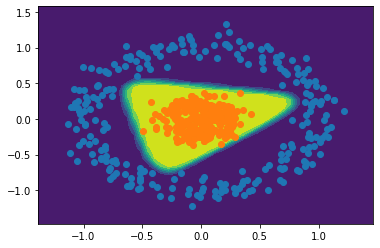

In [27]:
plot_decision_boundary(X, y)
scatter_plot()

prediction is: 1


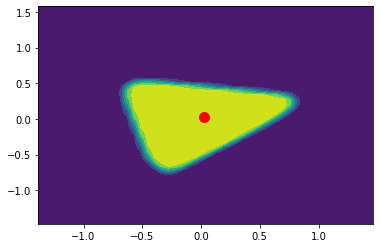

In [28]:
x = 0.025
y = 0.025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'red')
print(f'prediction is: {prediction}')
plot_decision_boundary(X, y)